In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
data = pd.read_csv('wdbc.data')

Leemos los datos y comenzamos a analizar posibles anomalias

In [5]:
print(data.head(10))

     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
5    844359  M  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270   
6  84458202  M  13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366   
7    844981  M  13.00  21.82   87.50   519.8  0.12730  0.19320  0.18590   
8  84501001  M  12.46  24.04   83.97   475.9  0.11860  0.23960  0.22730   
9    845636  M  16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
1  0.12790  ...  23.57  25.5

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

Comenzamos a precesar y a limpiar los Datos

In [7]:
# Asignar nombres a las columnas
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data.columns = columns

In [8]:
print(data.head(10))

         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842517         M      20.57      17.77     132.90     1326.0    0.08474   
1  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
2  84348301         M      11.42      20.38      77.58      386.1    0.14250   
3  84358402         M      20.29      14.34     135.10     1297.0    0.10030   
4    843786         M      12.45      15.70      82.57      477.1    0.12780   
5    844359         M      18.25      19.98     119.60     1040.0    0.09463   
6  84458202         M      13.71      20.83      90.20      577.9    0.11890   
7    844981         M      13.00      21.82      87.50      519.8    0.12730   
8  84501001         M      12.46      24.04      83.97      475.9    0.11860   
9    845636         M      16.02      23.24     102.70      797.8    0.08206   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.07864    0.08690    0.07017  ... 

In [9]:
data.isnull()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

ID            0
Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64

In [11]:
data.drop('ID', axis=1, inplace=True)

In [12]:
data.head()

,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [13]:
# Distribución de las clases
print(data['Diagnosis'].value_counts())


Diagnosis
B    357
M    211
Name: count, dtype: int64


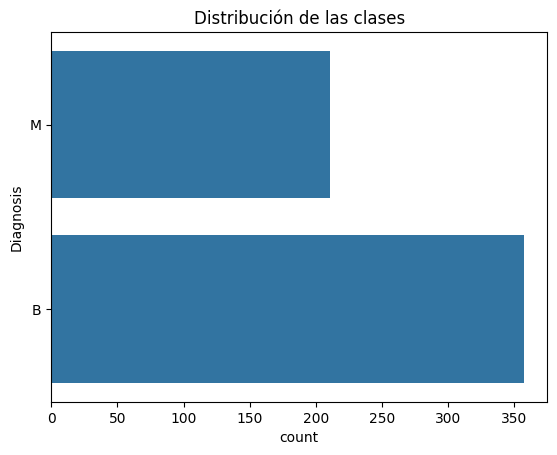

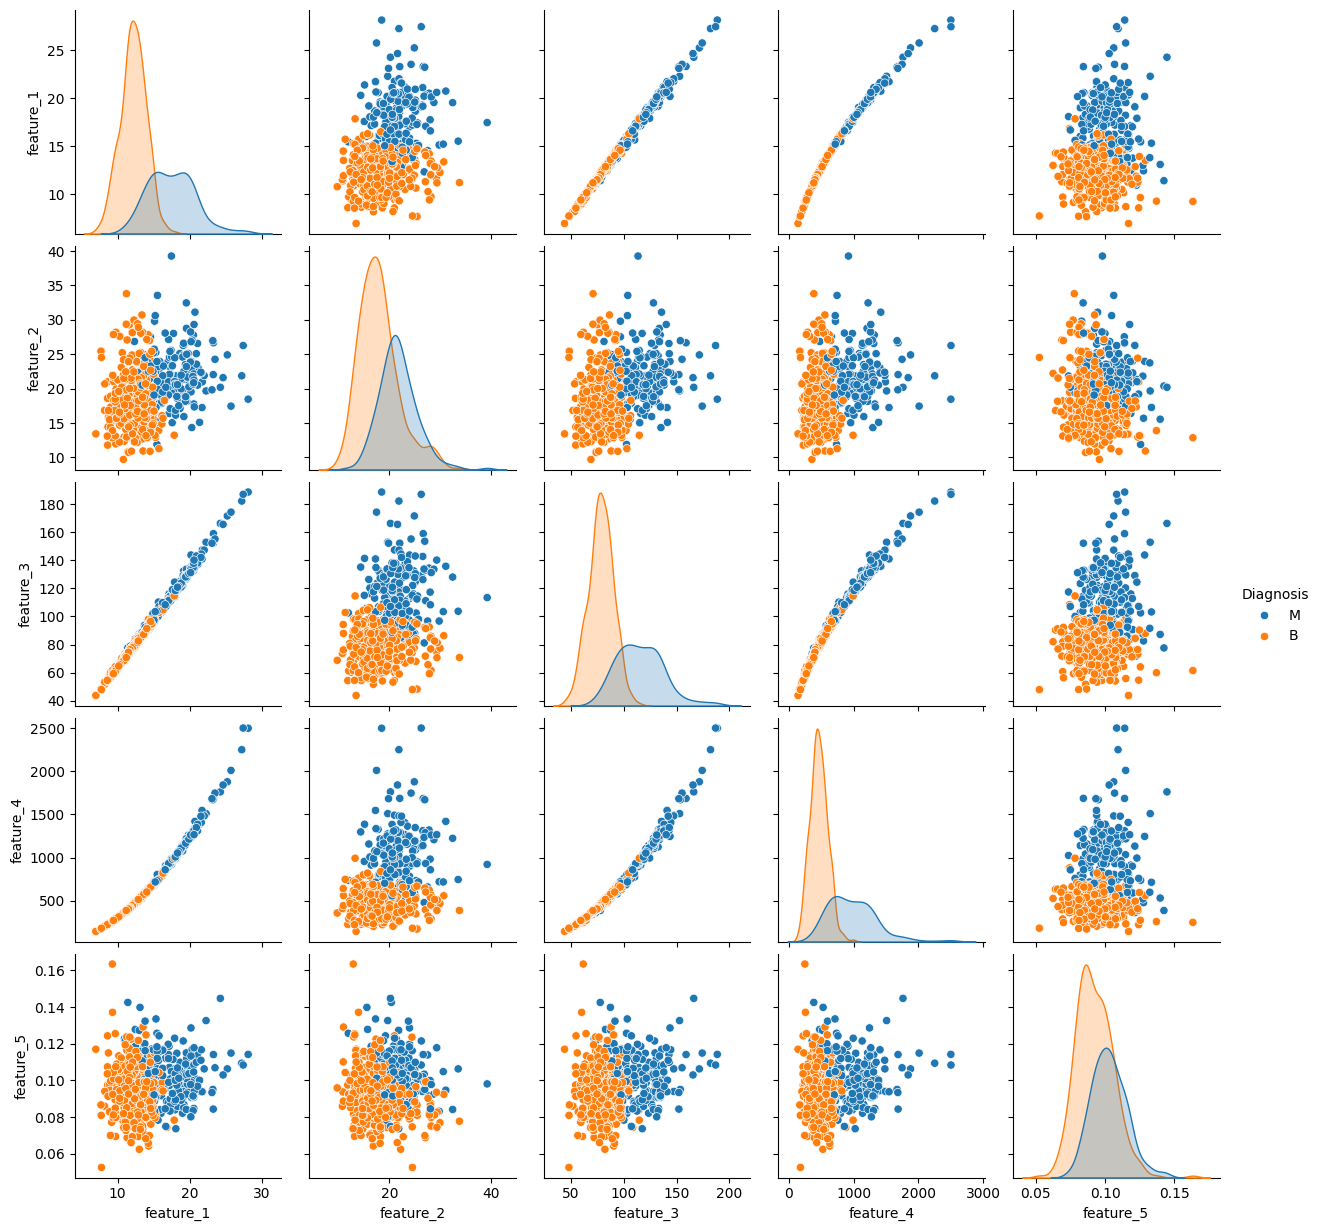

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de las clases
sns.countplot(data['Diagnosis'])
plt.title('Distribución de las clases')
plt.show()

# Visualización de algunas características
sns.pairplot(data[['Diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']], hue='Diagnosis')
plt.show()


Convertir la salida tipo object en un valor numerico 

In [15]:
# Asegurarse de que todos los valores en 'Diagnosis' son cadenas de texto
data['Diagnosis'] = data['Diagnosis'].astype(str)

# Verificar los valores únicos en la columna 'Diagnosis'
print("Valores únicos antes de la limpieza:", data['Diagnosis'].unique())

# Eliminar espacios en blanco y convertir a mayúsculas para uniformidad
data['Diagnosis'] = data['Diagnosis'].str.strip().str.upper()

# Verificar los valores únicos después de la limpieza
print("Valores únicos después de la limpieza:", data['Diagnosis'].unique())

# Convertir las etiquetas de diagnóstico a valores numéricos (M = maligno, B = benigno)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Verificar la conversión
print(data.head(10))

Valores únicos antes de la limpieza: ['M' 'B']
Valores únicos después de la limpieza: ['M' 'B']
   Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1      20.57      17.77     132.90     1326.0    0.08474   
1          1      19.69      21.25     130.00     1203.0    0.10960   
2          1      11.42      20.38      77.58      386.1    0.14250   
3          1      20.29      14.34     135.10     1297.0    0.10030   
4          1      12.45      15.70      82.57      477.1    0.12780   
5          1      18.25      19.98     119.60     1040.0    0.09463   
6          1      13.71      20.83      90.20      577.9    0.11890   
7          1      13.00      21.82      87.50      519.8    0.12730   
8          1      12.46      24.04      83.97      475.9    0.11860   
9          1      16.02      23.24     102.70      797.8    0.08206   

   feature_6  feature_7  feature_8  feature_9  ...  feature_21  feature_22  \
0    0.07864    0.08690    0.07017     0.181

In [16]:
x = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
# Función para sobremuestrear manualmente la clase minoritaria
def balance_classes(X, y):
    # Combinar X e y en un DataFrame
    data = pd.concat([X, y], axis=1)
    
    # Separar las clases mayoritaria y minoritaria
    class_majority = data[data['Diagnosis'] == y.value_counts().idxmax()]
    class_minority = data[data['Diagnosis'] == y.value_counts().idxmin()]
    
    # Sobremuestrear la clase minoritaria
    class_minority_upsampled = class_minority.sample(n=len(class_majority), replace=True, random_state=42)
    
    # Combinar clases mayoritaria y minoritaria sobremuestreada
    data_balanced = pd.concat([class_majority, class_minority_upsampled])
    
    # Separar de nuevo las características y la etiqueta
    X_balanced = data_balanced.drop('Diagnosis', axis=1)
    y_balanced = data_balanced['Diagnosis']
    
    return X_balanced, y_balanced

# Aplicar la función de balanceo
X_balanced, y_balanced = balance_classes(x, y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size=0.20, random_state=42)

Escalamos los datos, para que le modelo los pueda ingerir de mejor manera 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [19]:
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
447,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463
135,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343
366,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,0.05916,...,14.29,24.04,93.85,624.6,0.1368,0.2170,0.24130,0.08829,0.3218,0.07470
352,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,...,18.51,33.22,121.20,1050.0,0.1660,0.2356,0.40290,0.15260,0.2654,0.09438
12,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,14.77,20.50,97.67,677.3,0.1478,0.2256,0.30090,0.09722,0.3849,0.08633
221,10.18,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,...,11.17,22.84,71.94,375.6,0.1406,0.1440,0.06572,0.05575,0.3055,0.08797
455,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758


In [20]:
x_test


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
242,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,...,15.01,26.34,98.00,706.0,0.09368,0.1442,0.1359,0.06106,0.2663,0.06321
531,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,...,15.85,20.20,101.60,773.4,0.12640,0.1564,0.1206,0.08704,0.2806,0.07782
105,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.14,29.26,85.51,521.7,0.16880,0.2660,0.2873,0.12180,0.2806,0.09097
483,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,17.01,14.20,112.50,854.3,0.15410,0.2979,0.4004,0.14520,0.2557,0.08181
214,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,15.75,26.93,104.40,750.1,0.14600,0.4370,0.4636,0.16540,0.3630,0.10590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
270,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.1507,0.1275,0.08750,0.2733,0.08022
480,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.1415,0.1673,0.08150,0.2356,0.07603
108,11.34,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.01899,0.1487,0.06529,...,13.01,29.15,83.99,518.1,0.16990,0.2196,0.3120,0.08278,0.2829,0.08832


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
modelo = SVC(kernel='linear', C=1.0, random_state=42)
modelo.fit(X_train, y_train)
y_pred_linear = modelo.predict(X_test)
print("Linear Kernel SVM Model Accuracy: ", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# Entrenar y evaluar el modelo SVM con kernel polinomial
modelo = SVC(kernel='poly', degree=3)
modelo.fit(X_train, y_train)
y_pred_poly = modelo.predict(X_test)
print("Polynomial Kernel SVM Model Accuracy: ", accuracy_score(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

# Entrenar y evaluar el modelo SVM con kernel RBF (gaussiano)
modelo = SVC(kernel='rbf')
modelo.fit(X_train, y_train)
y_pred_rbf = modelo.predict(X_test)
print("RBF Kernel SVM Model Accuracy: ", accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

Linear Kernel SVM Model Accuracy:  0.9790209790209791
[[79  2]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.97      0.98      0.98        62

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Polynomial Kernel SVM Model Accuracy:  0.9790209790209791
[[78  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.95      1.00      0.98        62

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

RBF Kernel SVM Model Accuracy:  0.986013986013986
[[79  2]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1      

In [28]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    # Evaluación en el conjunto de entrenamiento
    y_train_pred = modelo.predict(X_train)
    print("Evaluación en el conjunto de entrenamiento:")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
    # Evaluación en el conjunto de prueba
    y_test_pred = modelo.predict(X_test)
    print("Evaluación en el conjunto de prueba:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))

# Entrenar y evaluar el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
print("SVM con kernel lineal")
evaluar_modelo(svm_linear, X_train, y_train, X_test, y_test)



SVM con kernel lineal
Evaluación en el conjunto de entrenamiento:
Accuracy: 0.9824868651488616
[[272   4]
 [  6 289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       276
           1       0.99      0.98      0.98       295

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571

Evaluación en el conjunto de prueba:
Accuracy: 0.9790209790209791
[[79  2]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.97      0.98      0.98        62

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [30]:
# Entrenar y evaluar el modelo SVM con kernel polinomial, el degree indica que es de grado 3
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
print("SVM con kernel polinomial")
evaluar_modelo(svm_poly, X_train, y_train, X_test, y_test)


SVM con kernel polinomial
Evaluación en el conjunto de entrenamiento:
Accuracy: 0.9544658493870403
[[253  23]
 [  3 292]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       276
           1       0.93      0.99      0.96       295

    accuracy                           0.95       571
   macro avg       0.96      0.95      0.95       571
weighted avg       0.96      0.95      0.95       571

Evaluación en el conjunto de prueba:
Accuracy: 0.9790209790209791
[[78  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.95      1.00      0.98        62

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [31]:
# Entrenar y evaluar el modelo SVM con kernel RBF (gaussiano)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
print("SVM con kernel RBF (gaussiano)")
evaluar_modelo(svm_rbf, X_train, y_train, X_test, y_test)

SVM con kernel RBF (gaussiano)
Evaluación en el conjunto de entrenamiento:
Accuracy: 0.9807355516637478
[[271   5]
 [  6 289]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       276
           1       0.98      0.98      0.98       295

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571

Evaluación en el conjunto de prueba:
Accuracy: 0.986013986013986
[[79  2]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.97      1.00      0.98        62

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

